# 📘 Polynomial Regression: Different Implementations

## 📌 Introduction
This notebook demonstrates how to solve a polynomial regression problem using three different approaches:
1. **Scikit-Learn** (Traditional Machine Learning approach)
2. **TensorFlow** (Deep Learning framework)
3. **PyTorch** (Deep Learning framework)

We will use a dataset related to an **economy of scale scenario**, where cost reductions occur as production increases. The goal is to model the non-linear relationship between production levels and cost.

---

In [1]:
## 📊 Step 1: Load and Explore the Data
import os 
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Dynamically construct the file path
base_dir = os.path.abspath(os.path.join(os.getcwd(),"..", "..", "..", "data", "01_Aprendizaje_Supervisado", "01_Regression"))
file_path = os.path.join(base_dir, "Economy of Scale.csv")
df = pd.read_csv(file_path)
df.head()

,Units,Cost
0,1.0,95.1
1,1.2,96.5
2,1.2,73.7
3,1.2,95.6
4,1.3,98.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Units   1000 non-null   float64
 1   Cost    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [4]:
df.describe()

,Units,Cost
count,1000.000000,1000.000000
mean,4.471500,40.053200
std,1.336437,10.596183
min,1.000000,20.000000
25%,3.600000,32.900000
50%,4.400000,38.300000
75%,5.300000,44.525000
max,10.000000,100.000000


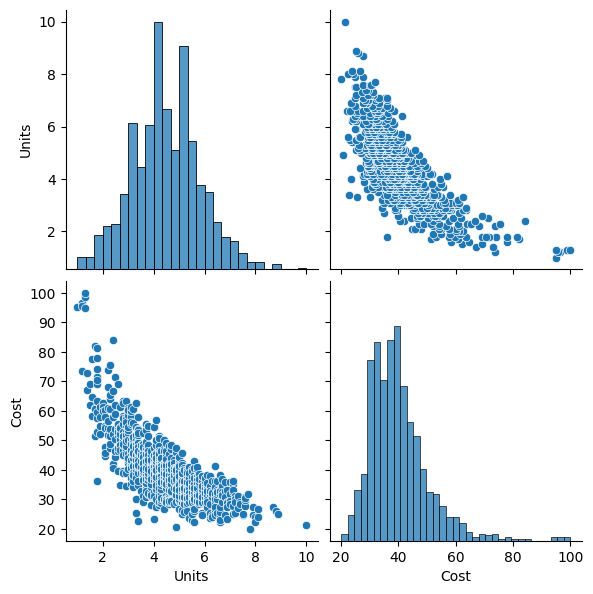

In [8]:
sns.pairplot(df, height=3)
plt.show()

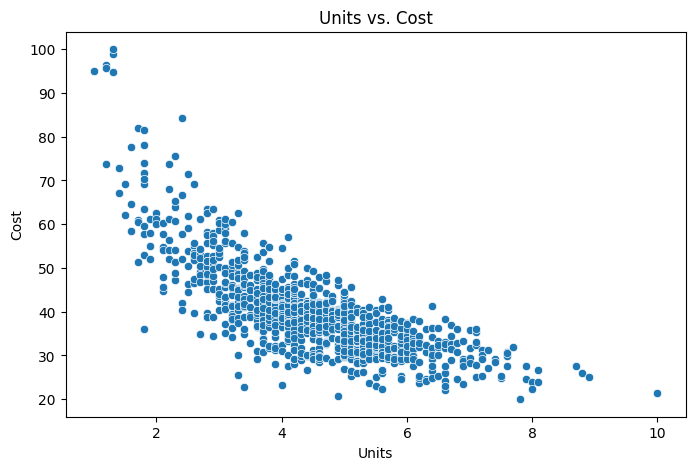

In [10]:
# Visualize the relationship between the features and the response using scatterplots
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Units', y='Cost', data=df)
plt.title('Units vs. Cost')
plt.xlabel('Units')
plt.ylabel('Cost')
plt.show()

In [11]:
# Spliting the data into training and testing sets
X = df['Units'].values
y = df['Cost'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
## 🏗️ Step 2: Polynomial Regression with Scikit-Learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a PolynomialFeatures object with degree 2
poly_features = PolynomialFeatures(degree=4)

# Transform the features to higher degree features
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2: {r2:.2f}')


Mean Squared Error: 31.90
R^2: 0.71


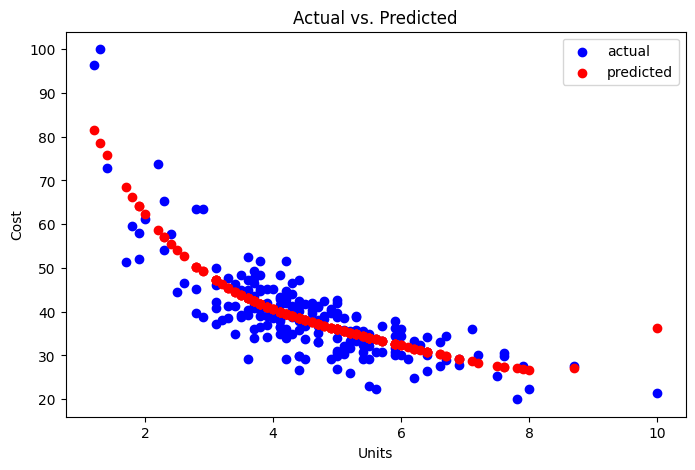

In [39]:
# Visualize the model fit
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='actual')
plt.scatter(X_test, y_test_pred, color='red', label='predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Units')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [44]:
## 🤖 Step 3: Polynomial Regression with TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

# Create a Sequential model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=[X_train_poly.shape[1]]))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_poly, y_train, epochs=1000, verbose=0)

# Make predictions
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2: {r2:.2f}')


c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 30.62
R^2: 0.72


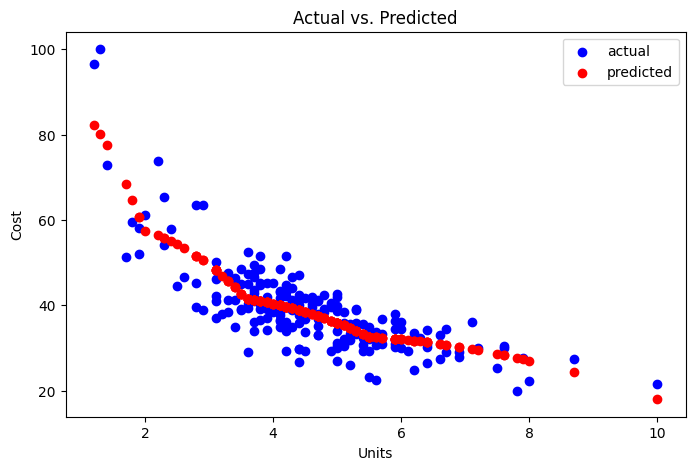

In [45]:
# Visualize the model fit
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='actual')
plt.scatter(X_test, y_test_pred, color='red', label='predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Units')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [60]:
## 🔥 Step 4: Polynomial Regression with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Convert the NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_poly, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_poly, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create a custom PyTorch model
class PolynomialRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x)
    
model = PolynomialRegression(input_dim=X_train_tensor.shape[1])

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.6)

# train the model
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Make predictions
y_test_pred = model(X_test_tensor)

# Evaluate the model
mse = criterion(y_test_pred, y_test_tensor)
r2 = r2_score(y_test_tensor.detach().numpy(), y_test_pred.detach().numpy())

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Mean Squared Error: 37.47
R^2: 0.66


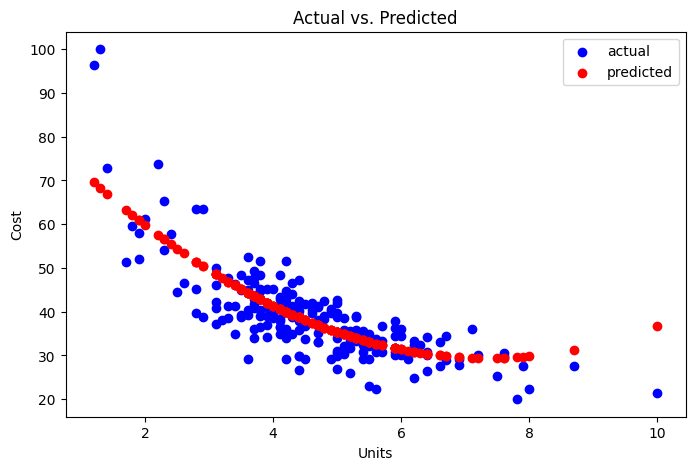

In [61]:
# Visualize the model fit
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='actual')
plt.scatter(X_test, y_test_pred.detach().numpy(), color='red', label='predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Units')
plt.ylabel('Cost')
plt.legend()
plt.show()